In [1]:
import tensorflow as tf
import pickle
import os
import numpy as np
import scipy.misc
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\pyth

In [2]:
import loader
import model

# Hand Segmentation

In [3]:
config = {
    'ID' : 'handseg_01',
    'n_iter' : 20000,
    'n_prt' : 100,
    'input_h' : 320,
    'input_w' : 320,
    'input_ch' : 3,
    'n_output' : 10,
    'n_batch' : 8,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 1e-5,
    'random_crop' : True,
    'training' : True,
}

In [4]:
SegNet = model.Hand3DPoseNet(config=config)

[FileExistsError] Will you remove directory? [Y/N] Y
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Model ID : handseg_01
Model will be saved at : ./handseg_01


In [5]:
training_loader = loader.Data('training')

In [6]:
SegNet.train_HadSegNet(training_loader)

loss seg (0/20000) : 0.5232830047607422
INFO:tensorflow:./handseg_01/checkpoint/handseg_01_1000 is not in all_model_checkpoint_paths. Manually adding it.
loss seg (100/20000) : 0.1820988953113556
loss seg (200/20000) : 0.1622808277606964
loss seg (300/20000) : 0.18334504961967468
loss seg (400/20000) : 0.1571887731552124
loss seg (500/20000) : 0.13908997178077698
loss seg (600/20000) : 0.15396034717559814
loss seg (700/20000) : 0.13564279675483704
loss seg (800/20000) : 0.15765807032585144
loss seg (900/20000) : 0.1496514528989792
loss seg (1000/20000) : 0.14062198996543884
INFO:tensorflow:./handseg_01/checkpoint/handseg_01_2000 is not in all_model_checkpoint_paths. Manually adding it.
loss seg (1100/20000) : 0.15508431196212769
loss seg (1200/20000) : 0.10828230530023575
loss seg (1300/20000) : 0.08783447742462158
loss seg (1400/20000) : 0.08922486007213593
loss seg (1500/20000) : 0.13315242528915405
loss seg (1600/20000) : 0.1322501003742218
loss seg (1700/20000) : 0.1507910341024398

loss seg (14700/20000) : 0.04292573034763336
loss seg (14800/20000) : 0.051272593438625336
loss seg (14900/20000) : 0.051553331315517426
loss seg (15000/20000) : 0.04378250241279602
INFO:tensorflow:./handseg_01/checkpoint/handseg_01_16000 is not in all_model_checkpoint_paths. Manually adding it.
loss seg (15100/20000) : 0.05939489230513573
loss seg (15200/20000) : 0.05094291269779205
loss seg (15300/20000) : 0.08970566093921661
loss seg (15400/20000) : 0.03596952557563782
loss seg (15500/20000) : 0.09320621192455292
loss seg (15600/20000) : 0.06548058241605759
loss seg (15700/20000) : 0.07796160131692886
loss seg (15800/20000) : 0.09317082911729813
loss seg (15900/20000) : 0.0358610600233078
loss seg (16000/20000) : 0.042239829897880554
INFO:tensorflow:./handseg_01/checkpoint/handseg_01_17000 is not in all_model_checkpoint_paths. Manually adding it.
loss seg (16100/20000) : 0.05824527144432068
loss seg (16200/20000) : 0.05622091516852379
loss seg (16300/20000) : 0.03531168773770332
los

In [7]:
SegNet.sess.close()

# Load Model

In [8]:
config_test = {
    'ID' : 'test_model',
    'n_iter' : 20000,
    'n_prt' : 100,
    'input_h' : 320,
    'input_w' : 320,
    'input_ch' : 3,
    'n_output' : 10,
    'n_batch' : 8,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 1e-5,
    'random_crop' : False,
    'training' : False,
}

In [9]:
SegNet_test = model.Hand3DPoseNet(config=config_test)

[FileExistsError] Will you remove directory? [Y/N] Y
Model ID : test_model
Model will be saved at : ./test_model


In [10]:
SegNet_test.load('./handseg_01/checkpoint/handseg_01_20000')

INFO:tensorflow:Restoring parameters from ./handseg_01/checkpoint/handseg_01_20000
Model loaded from file : ./handseg_01/checkpoint/handseg_01_20000


# Test

In [11]:
evaluation_loader = loader.Data('evaluation')

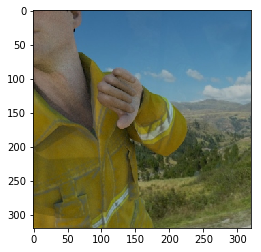

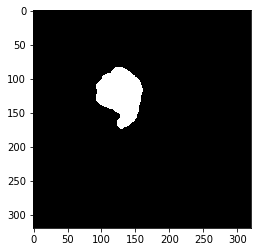

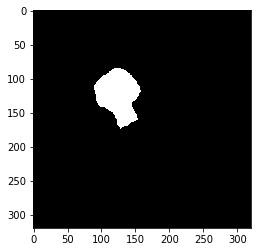

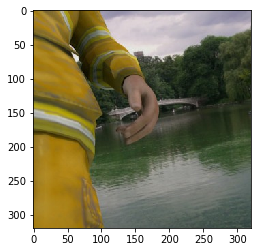

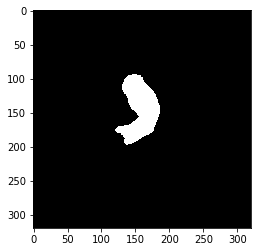

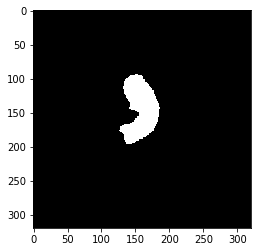

In [14]:
imgs, masks, depths, annos = evaluation_loader.load_batch(8)
mask_pred = SegNet_test.sess.run(SegNet_test.hand_seg_pred, feed_dict = {
    SegNet_test.imgs : imgs,
    SegNet_test.masks : masks,
    SegNet_test.depths : depths
})

mp = np.argmax(mask_pred, axis=3)

for idx in range(2):

    plt.imshow(imgs[idx])
    plt.show()

    hands = (np.ones(masks.shape) < masks).astype(int)
    plt.imshow(hands[idx,:,:,0], 'gray')
    plt.show()

    plt.imshow(mp[idx], 'gray')
    plt.show()

# Data Load

In [ ]:
set = 'evaluation'
f1 = open('./RHD_published_v2/{}/anno_{}.pickle'.format(set,set), 'rb')
anno_all = pickle.load(f1)
f1.close()